<a href="https://colab.research.google.com/github/danilovabg/SkillFactory/blob/master/project_time_series_Danilova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
from warnings import filterwarnings

In [103]:
filterwarnings("ignore")

S&P 500 — фондовый индекс, в корзину которого включено 505 акций 500 избранных торгуемых на фондовых биржах США

In [134]:
import pandas as pd

data = pd.read_csv("/content/ghana_gdp.csv", parse_dates=["year"], index_col=["year"])
data.head()

,GDP (current US$)
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09


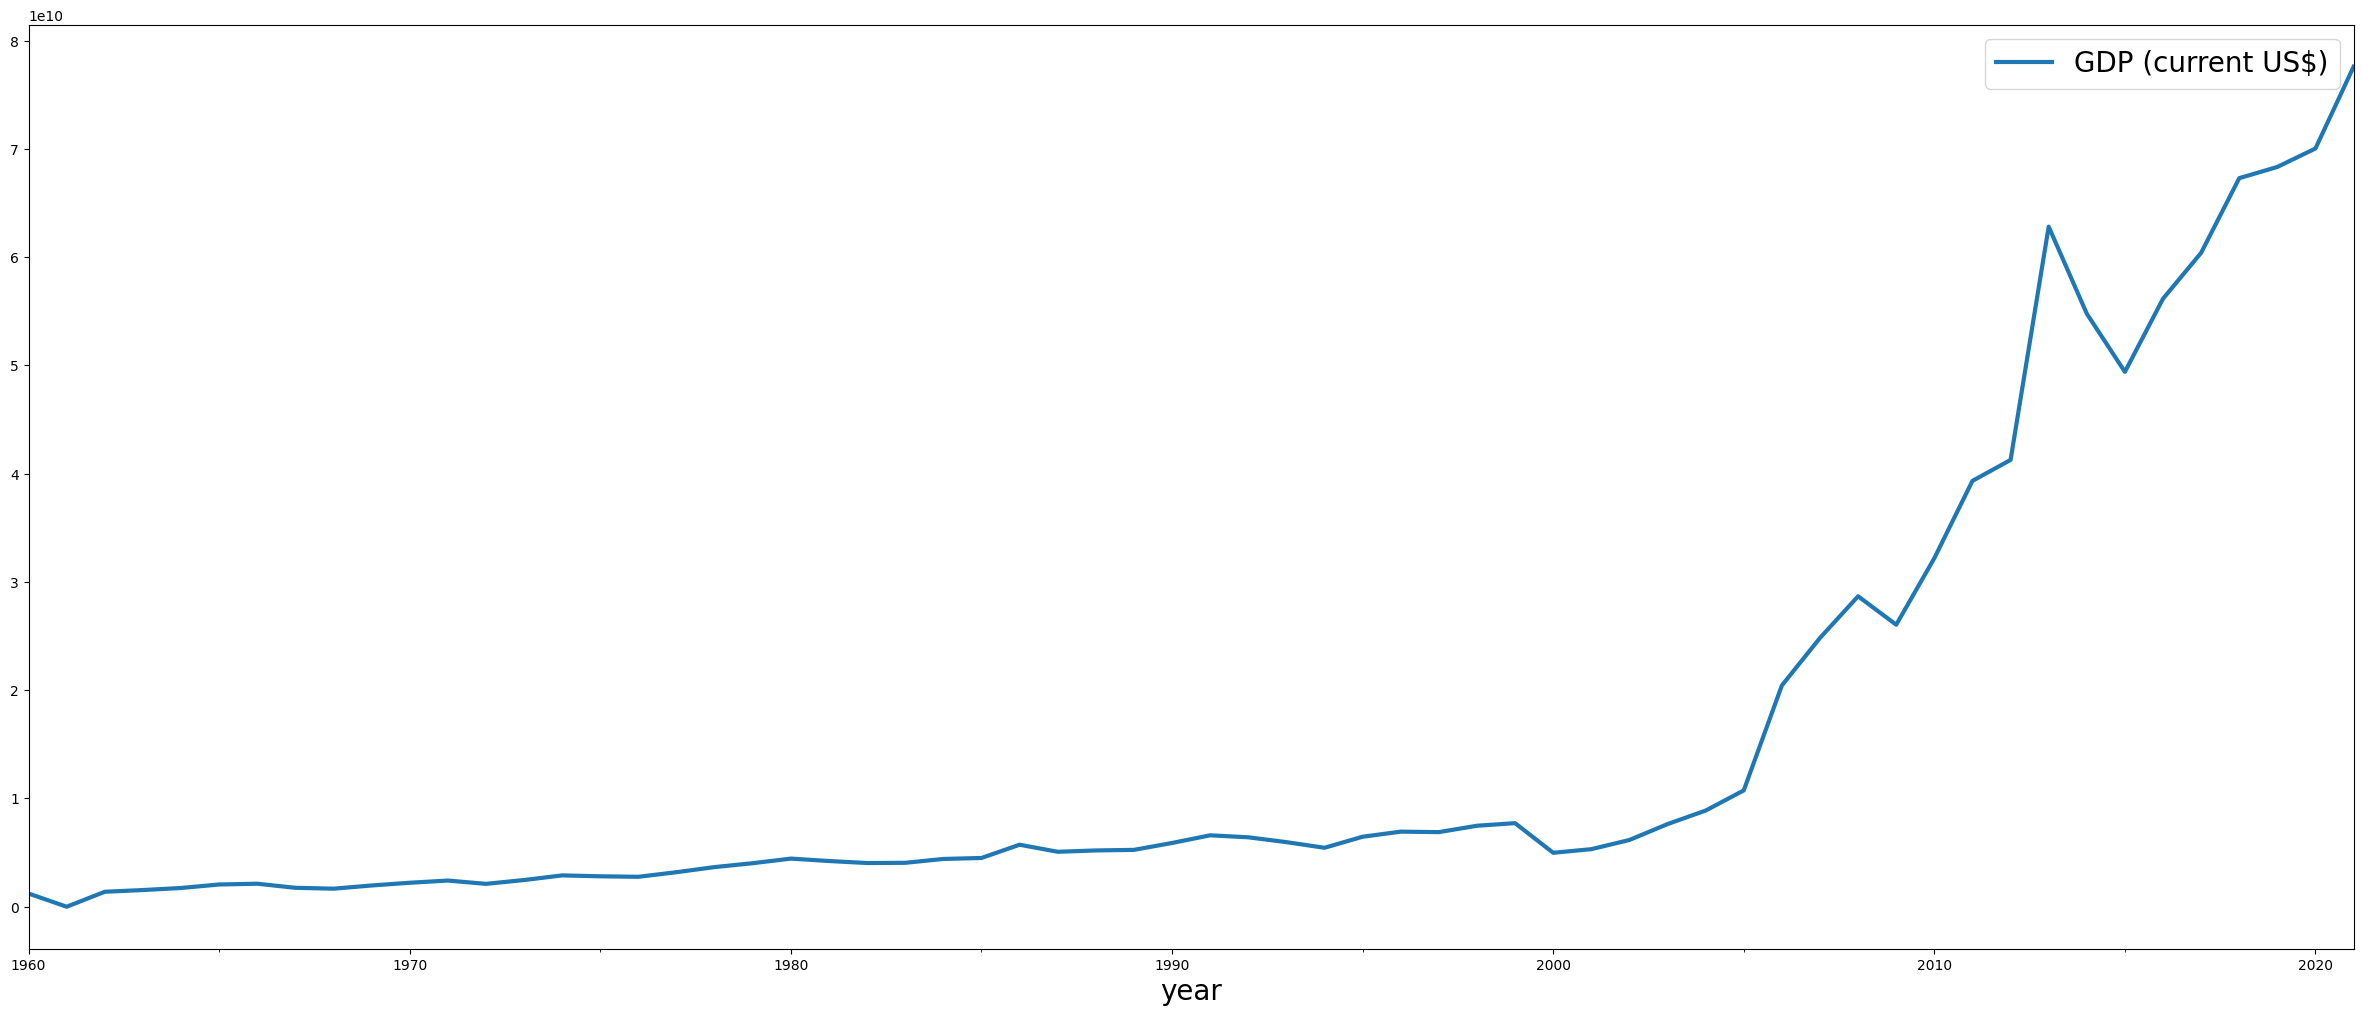

In [105]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = 30, 12
plt.rcParams["font.size"] = 20
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["lines.linewidth"] = 3

data.plot()
plt.show()

In [14]:
train_df = data.iloc[:-3]
test_df = data.iloc[-3:]
train_df.shape, test_df.shape

((59, 1), (3, 1))

In [15]:
data.columns

Index(['GDP (current US$)'], dtype='object')

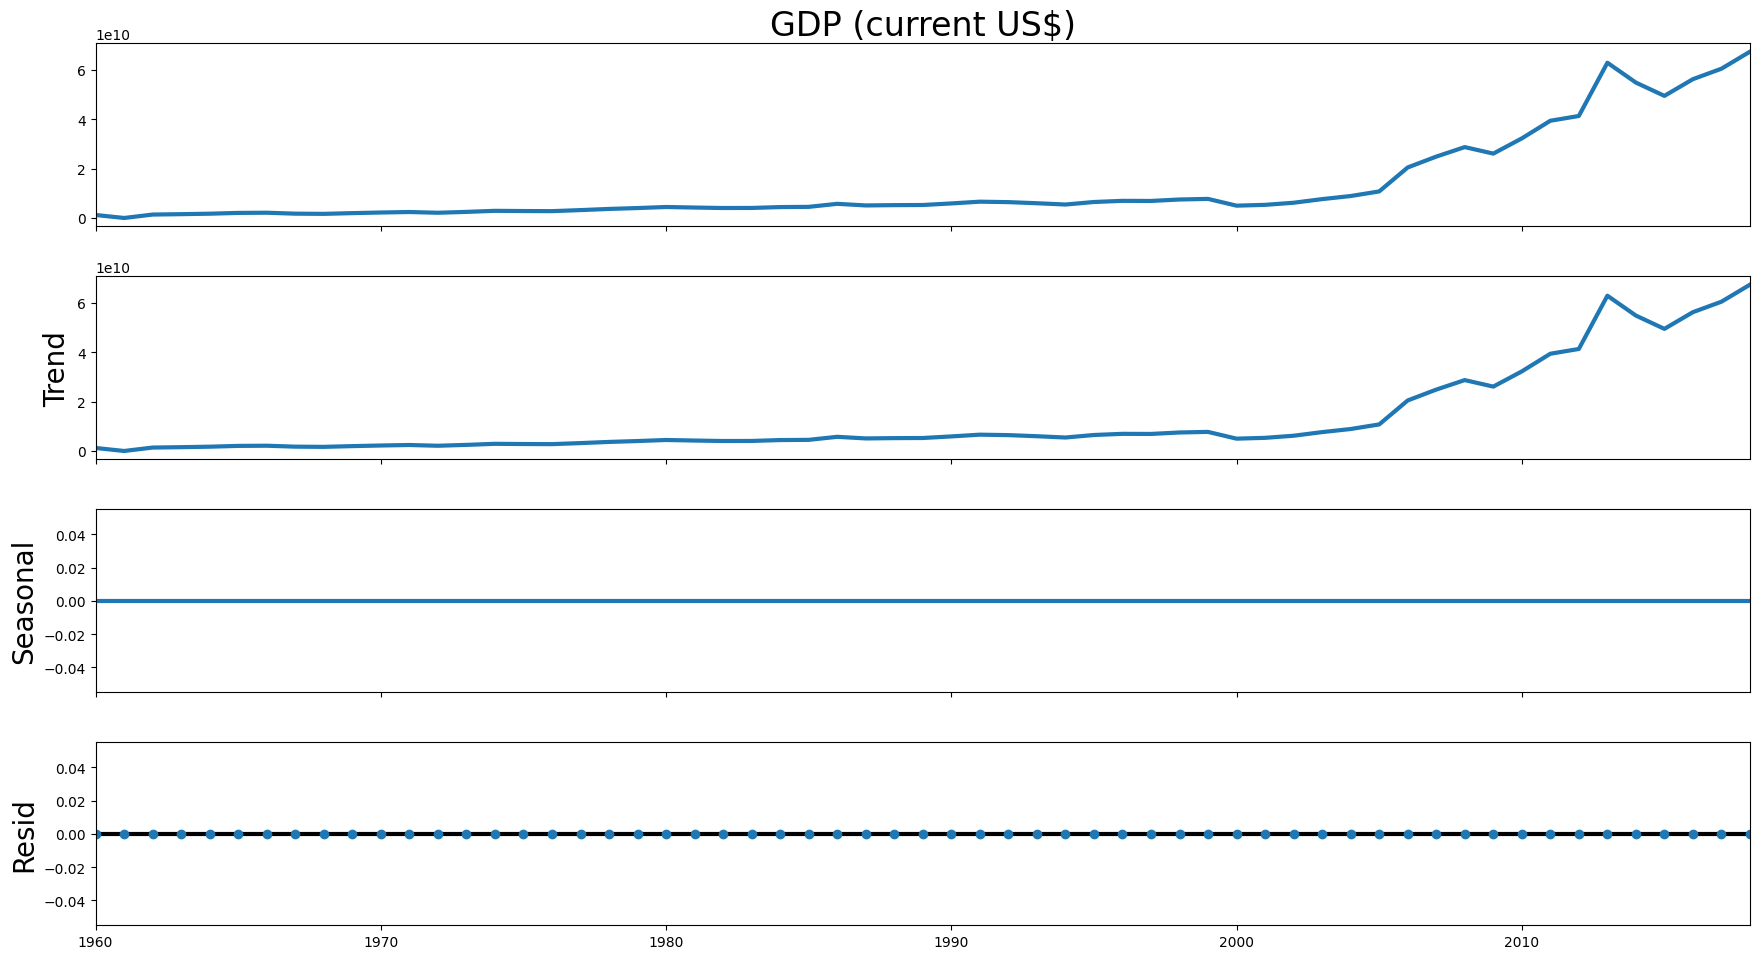

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams["figure.figsize"] = 18, 10

result = seasonal_decompose(train_df['GDP (current US$)'])
result.plot()
plt.show()

На графике четко виден тренд

так же видно что сезонность отсутствует

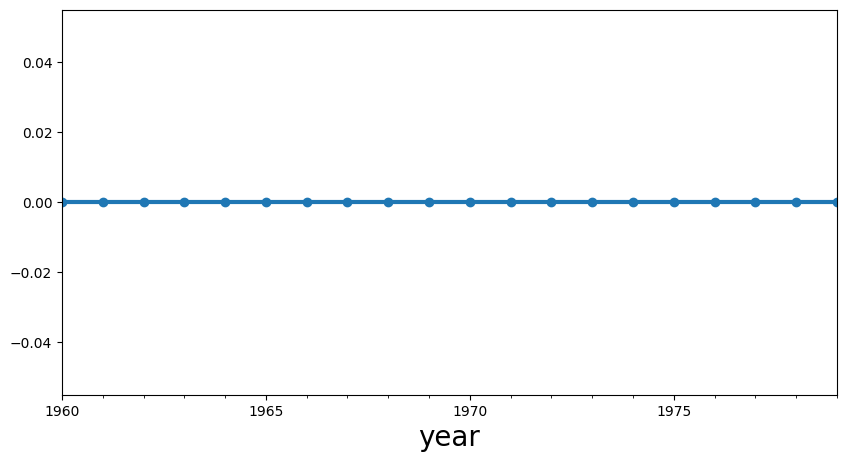

In [13]:
plt.rcParams["figure.figsize"] = 10, 5
result.seasonal[:20].plot(marker="o")
plt.show()

при более близком рассмотрении теория отсутствия сезонности подтвердилась

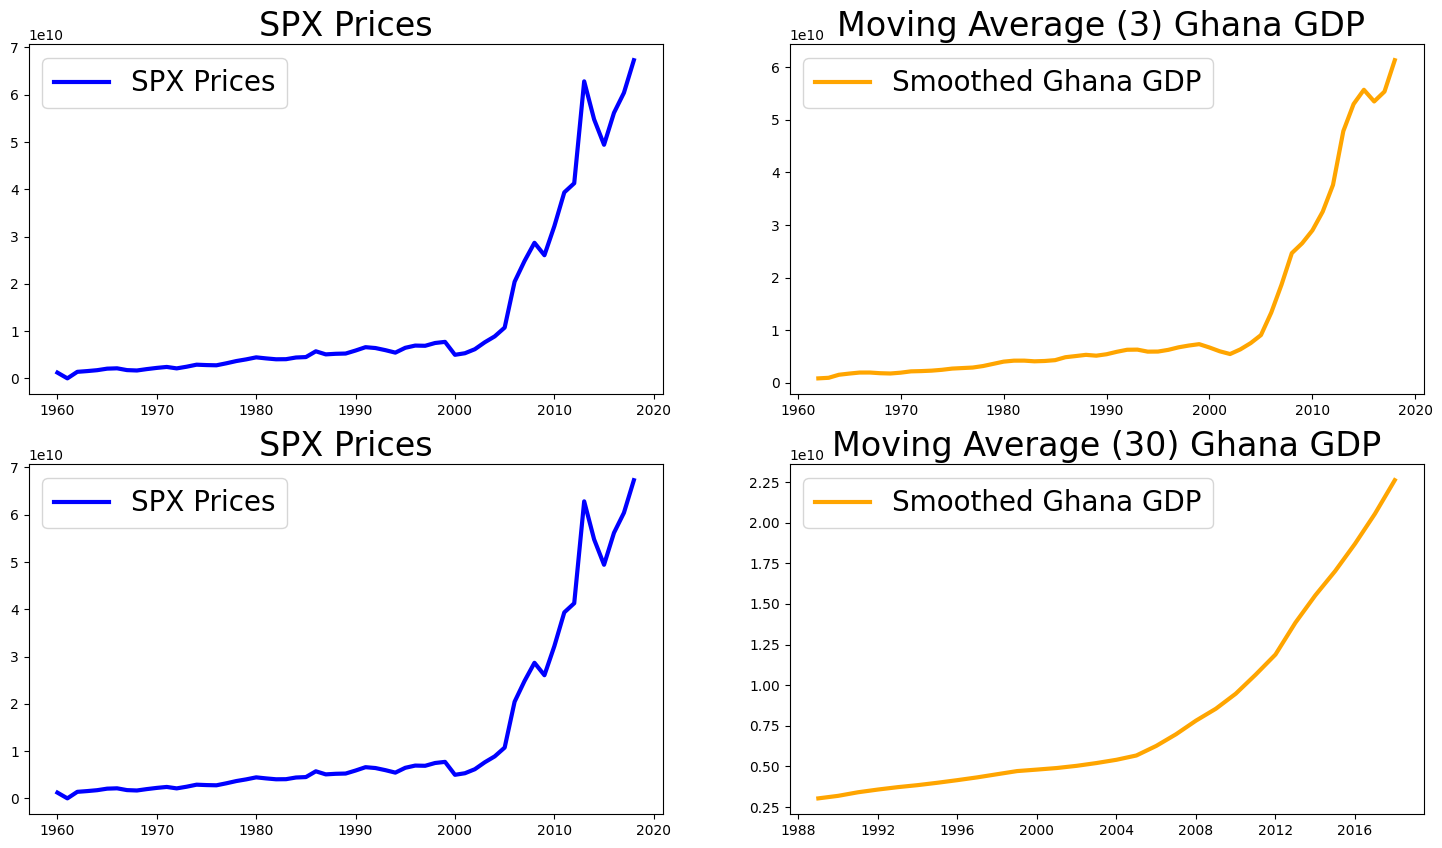

In [21]:
plt.rcParams["figure.figsize"] = 18, 10

fig, ax = plt.subplots(2, 2)

# Окно в месяц (Window = 30)
ax[0, 0].plot(train_df['GDP (current US$)'], color="blue", label="SPX Prices")
ax[0, 0].set_title("SPX Prices", size=24)
ax[0, 0].legend()

ax[0, 1].plot(
    train_df['GDP (current US$)'].rolling(window=3).mean(),
    color="orange",
    label="Smoothed Ghana GDP",
)

ax[0, 1].set_title("Moving Average (3) Ghana GDP ", size=24)
ax[0, 1].legend()


# Окно в год (Window = 300)
ax[1, 0].plot(train_df['GDP (current US$)'], color="blue", label="SPX Prices")
ax[1, 0].set_title("SPX Prices", size=24)
ax[1, 0].legend()

ax[1, 1].plot(
    train_df['GDP (current US$)'].rolling(window=30).mean(),
    color="orange",
    label="Smoothed Ghana GDP",
)

ax[1, 1].set_title("Moving Average (30) Ghana GDP", size=24)
ax[1, 1].legend()

plt.show()

С помощью скользящего среднего отчетливо видно тренд

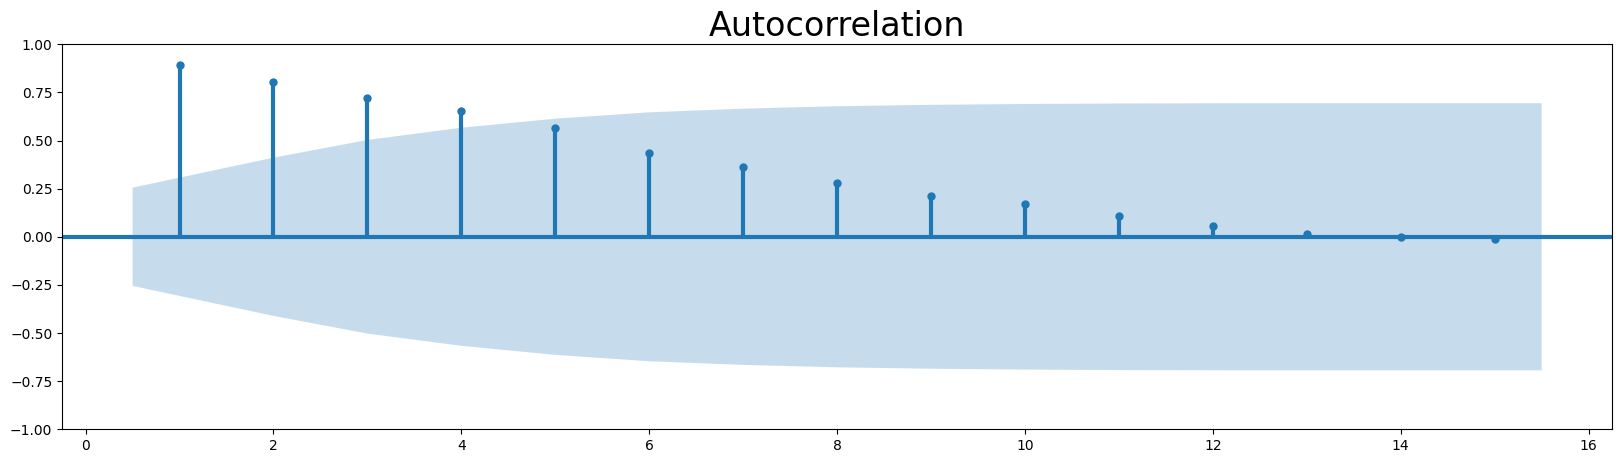

In [25]:
import statsmodels.graphics.tsaplots as sgt

plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_acf(train_df['GDP (current US$)'], lags=15, zero=False)
plt.show()

Видно что ВВП имеет достаточно сильную автокорреляцию с предыдущими 4 годами

параметр q = 4

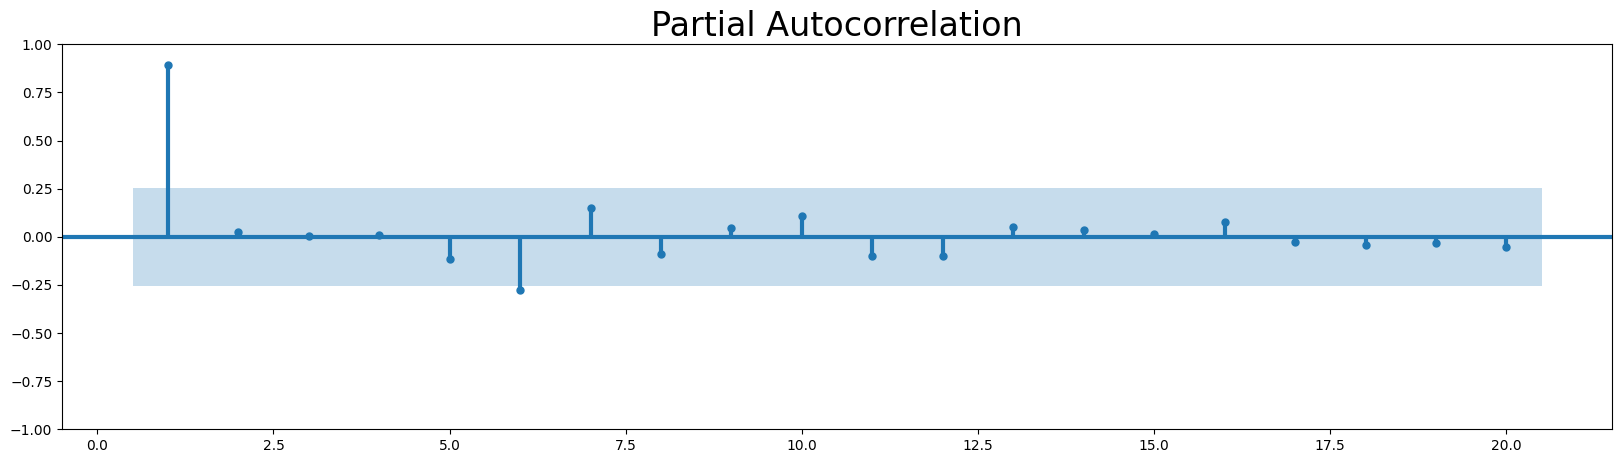

In [26]:
import statsmodels.graphics.tsaplots as sgt

plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_pacf(train_df['GDP (current US$)'], lags=20, method="ywm", zero=False)
plt.show()

На графике частичной автокорреляции можно отметить точку с лагом 6, это единственное значение корреляции выходящее за пределы "нулевого интервала" (кроме корреляции в текущий момент времени при р = 1)


Не смотря на то что показатель автокорреляции при значении р = 6 не нулевой, его значение достаточно маленькое и я не уверена что его стоит учитывать, проверим ряд на стационарность, возможно придется его дифференцировать и смотреть другие графики автокорреляций

In [28]:
from statsmodels.tsa.stattools import adfuller

adfuller(train_df['GDP (current US$)'])

(0.6529066974885405,
 0.9888496277665573,
 10,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 2194.301372914139)

In [30]:
test1 = adfuller(train_df['GDP (current US$)'])
print("adf: ", test1[0])
print("p-value: ", test1[1])
print("Critical values: ", test1[4])
if test1[0] > test1[4]["5%"]:
    print("ряд нестационарен")
else:
    print("ряд стационарен")

adf:  0.6529066974885405
p-value:  0.9888496277665573
Critical values:  {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
ряд нестационарен


In [36]:
test1 = adfuller(train_df['GDP (current US$)'].diff(periods=1).dropna())
print("adf: ", test1[0])
print("p-value: ", test1[1])
print("Critical values: ", test1[4])
if test1[0] > test1[4]["5%"]:
    print("ряд нестационарен")
else:
    print("ряд стационарен")

adf:  -1.670248303832082
p-value:  0.44650293297138693
Critical values:  {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
ряд нестационарен


In [37]:
test1 = adfuller(train_df['GDP (current US$)'].diff(periods=2).dropna())
print("adf: ", test1[0])
print("p-value: ", test1[1])
print("Critical values: ", test1[4])
if test1[0] > test1[4]["5%"]:
    print("ряд нестационарен")
else:
    print("ряд стационарен")

adf:  -3.5836708658260323
p-value:  0.006080989753876896
Critical values:  {'1%': -3.584828853223594, '5%': -2.9282991495198907, '10%': -2.6023438271604937}
ряд стационарен


Параметр d будет равен 2 так как только после второго дифферинцирования ряд становится стационарным
d = 2

In [38]:
def plot_acf_pacf(series):
    plt.rcParams["figure.figsize"] = 18, 5

    fig, axes = plt.subplots(1, 2)

    sgt.plot_acf(series, ax=axes[0], lags=25)
    sgt.plot_pacf(series, ax=axes[1], lags=25, method="ywm")
    plt.show()

## Дифференцирование ряда
$y\_new_t = y_t - y_{t-1}$

where,
- $y\_new_t$: Дифференцированное значение ряда $t$
- $y_t$: Фактическое значение ряда $t$
- $y_{t-1}$: Фактическое значение ряда $t-1$

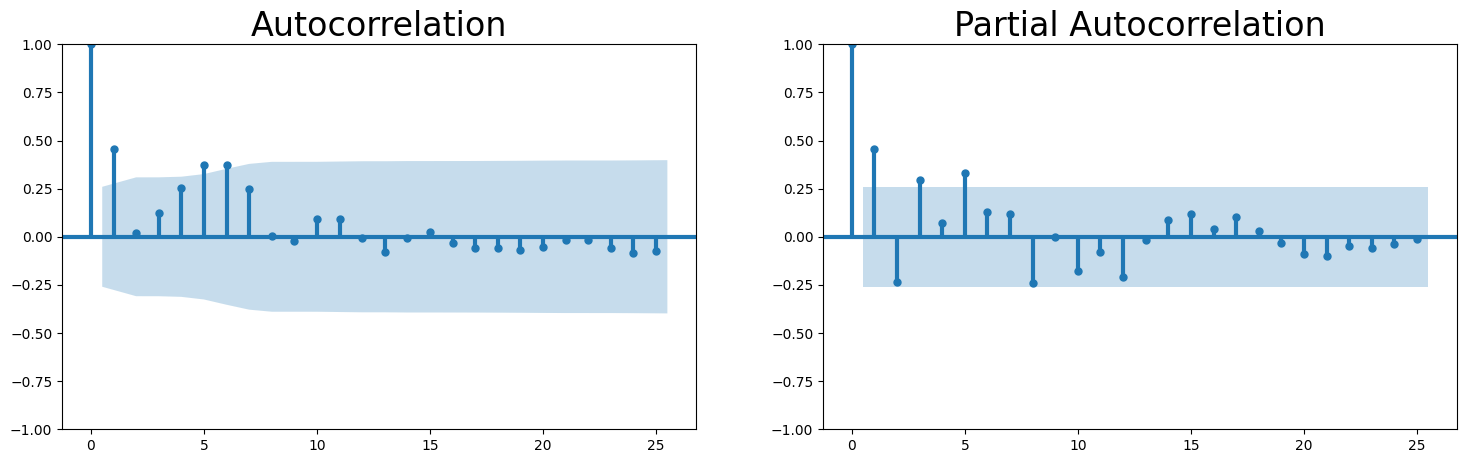

(-3.5836708658260323,
 0.006080989753876896,
 11,
 45,
 {'1%': -3.584828853223594,
  '5%': -2.9282991495198907,
  '10%': -2.6023438271604937},
 2100.77968010473)

In [39]:
plot_acf_pacf(train_df['GDP (current US$)'].diff(periods=2).dropna())
adfuller(train_df['GDP (current US$)'].diff(periods=2).dropna())

Первые разности являются стационарными

## ARIMA, SARIMA

Начнем построение модели **ARIMA** со следующими параметрами:

- p = 5
- d = 2
- q = 1

Если рассматривать сезонную модель (**SARMA**), то в модель можно добавить следующие параметры.

- m = 5 (будучи рыночным индексом, данные, скорее всего, будут иметь еженедельно повторяющиеся паттерны, как видно из визуализации)
- P = 1
- D = 1
- Q = 1

In [57]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_df['GDP (current US$)'].dropna(), order=(5, 2, 1))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   59
Model:                 ARIMA(5, 2, 1)   Log Likelihood               -1331.756
Date:                Tue, 12 Dec 2023   AIC                           2677.512
Time:                        11:37:35   BIC                           2691.813
Sample:                    01-01-1960   HQIC                          2683.070
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7719      0.374     -2.066      0.039      -1.504      -0.040
ar.L2         -0.7874      0.359     -2.192      0.028      -1.492      -0.083
ar.L3         -0.6264      0.387     -1.617      0.106      -1.385       0.133
ar.L4         -0.7573      0.314     -2.415      0.016      -1.372      -0.143
ar.L5         -0.3846      0.356     -1.079      0.281      -1.083       0.314
ma.L1         -0.3606      0.386     -0.934      0.351      -1.118       0.396
sigma2      1.285e+19   1.26e-20   1.02e+39      0.000    1.28e+19    1.28e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               203.11
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):             175.02   Skew:                             1.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_df['GDP (current US$)'].dropna(), order=(5, 2, 1))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   59
Model:               SARIMAX(5, 2, 1)   Log Likelihood               -1331.756
Date:                Tue, 12 Dec 2023   AIC                           2677.512
Time:                        11:26:24   BIC                           2691.813
Sample:                    01-01-1960   HQIC                          2683.070
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7719      0.374     -2.066      0.039      -1.504      -0.040
ar.L2         -0.7874      0.359     -2.192      0.028      -1.492      -0.083
ar.L3         -0.6264      0.387     -1.617      0.106      -1.385       0.133
ar.L4         -0.7573      0.314     -2.415      0.016      -1.372      -0.143
ar.L5         -0.3846      0.356     -1.079      0.281      -1.083       0.314
ma.L1         -0.3606      0.386     -0.934      0.351      -1.118       0.396
sigma2      1.285e+19   1.26e-20   1.02e+39      0.000    1.28e+19    1.28e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               203.11
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):             175.02   Skew:                             1.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

Второй столбец раздела I содержит некоторые полезные показатели, которые используются для сравнения различных моделей ARIMA. Как правило, модель с более высоким логарифмическим правдоподобием или более низким IC (AIC, BIC или HQIC) лучше, и наоборот.

In [55]:
# pip install pmdarima
import pmdarima as pm

smodel = pm.auto_arima(
    train_df,
    start_p=1,
    d=2,
    start_q=1,
    max_p=7,
    max_q=5,
    D=2,
    start_P=0,
    m=2,
    test="adf",
    error_action="ignore",
    trace=True,
)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,2,1)[2]             : AIC=2592.026, Time=0.19 sec
 ARIMA(0,2,0)(0,2,0)[2]             : AIC=2628.124, Time=0.05 sec
 ARIMA(1,2,0)(1,2,0)[2]             : AIC=2602.932, Time=0.18 sec
 ARIMA(0,2,1)(0,2,1)[2]             : AIC=2590.436, Time=0.16 sec
 ARIMA(0,2,1)(0,2,0)[2]             : AIC=2602.455, Time=0.11 sec
 ARIMA(0,2,1)(1,2,1)[2]             : AIC=2589.901, Time=0.15 sec
 ARIMA(0,2,1)(1,2,0)[2]             : AIC=2592.462, Time=0.12 sec
 ARIMA(0,2,1)(2,2,1)[2]             : AIC=2588.406, Time=0.51 sec
 ARIMA(0,2,1)(2,2,0)[2]             : AIC=2587.263, Time=0.44 sec
 ARIMA(0,2,0)(2,2,0)[2]             : AIC=inf, Time=0.65 sec
 ARIMA(1,2,1)(2,2,0)[2]             : AIC=2587.960, Time=0.84 sec
 ARIMA(1,2,0)(2,2,0)[2]             : AIC=inf, Time=0.50 sec
 ARIMA(0,2,1)(2,2,0)[2] intercept   : AIC=2589.580, Time=0.58 sec

Best model:  ARIMA(0,2,1)(2,2,0)[2]          
Total fit time: 4.557 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   59
Model:             SARIMAX(0, 2, 1)x(2, 2, [], 2)   Log Likelihood               -1289.632
Date:                            Tue, 12 Dec 2023   AIC                           2587.263
Time:                                    11:36:49   BIC                           2595.145
Sample:                                01-01-1960   HQIC                          2590.294
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8994      0.490     -1.836      0.066      -1.860       0.061
ar.S.L2       -1.0610      0.495     -2.145      0.032      -2.030      -0.092
ar.S.L4       -0.9998      0.436     -2.291      0.022      -1.855      -0.145
sigma2      1.846e+20   1.47e-21   1.26e+41      0.000    1.85e+20    1.85e+20
===================================================================================
Ljung-Box (L1) (Q):                   6.40   Jarque-Bera (JB):                46.41
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):             123.25   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.68e+56. Standard errors may be unstable.
"""

Интересно что сезонности на графиках не было видно, однако модель с параметрами для сезонности дает немного лучший результат

In [61]:
seas_model = SARIMAX(train_df['GDP (current US$)'].dropna(), order=(0, 2, 1), seasonal_order=(2, 2, 0, 2))
seas_model_fit = seas_model.fit()
seas_model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  GDP (current US$)   No. Observations:                   59
Model:             SARIMAX(0, 2, 1)x(2, 2, [], 2)   Log Likelihood               -1289.632
Date:                            Tue, 12 Dec 2023   AIC                           2587.263
Time:                                    11:43:04   BIC                           2595.145
Sample:                                01-01-1960   HQIC                          2590.294
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8994      0.490     -1.836      0.066      -1.860       0.061
ar.S.L2       -1.0610      0.495     -2.145      0.032      -2.030      -0.092
ar.S.L4       -0.9998      0.436     -2.291      0.022      -1.855      -0.145
sigma2      1.846e+20   1.47e-21   1.26e+41      0.000    1.85e+20    1.85e+20
===================================================================================
Ljung-Box (L1) (Q):                   6.40   Jarque-Bera (JB):                46.41
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):             123.25   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.68e+56. Standard errors may be unstable.
"""

Интересно

In [71]:
pred_df = pd.DataFrame(index=data.index)

pred_df["model_preds"] = seas_model_fit.predict(
    start=test_df.index[0], end=test_df.index[-1]
)


pred_df['GDP (current US$)'] = data['GDP (current US$)']

forecast = seas_model_fit.get_forecast(len(test_df.index))
forecast_df = forecast.conf_int(alpha=0.05)  # Confidence level of 95%


pred_df.at[test_df.index, "model_preds_lower"] = forecast_df["lower GDP (current US$)"]
pred_df.at[test_df.index, "model_preds_upper"] = forecast_df["upper GDP (current US$)"]

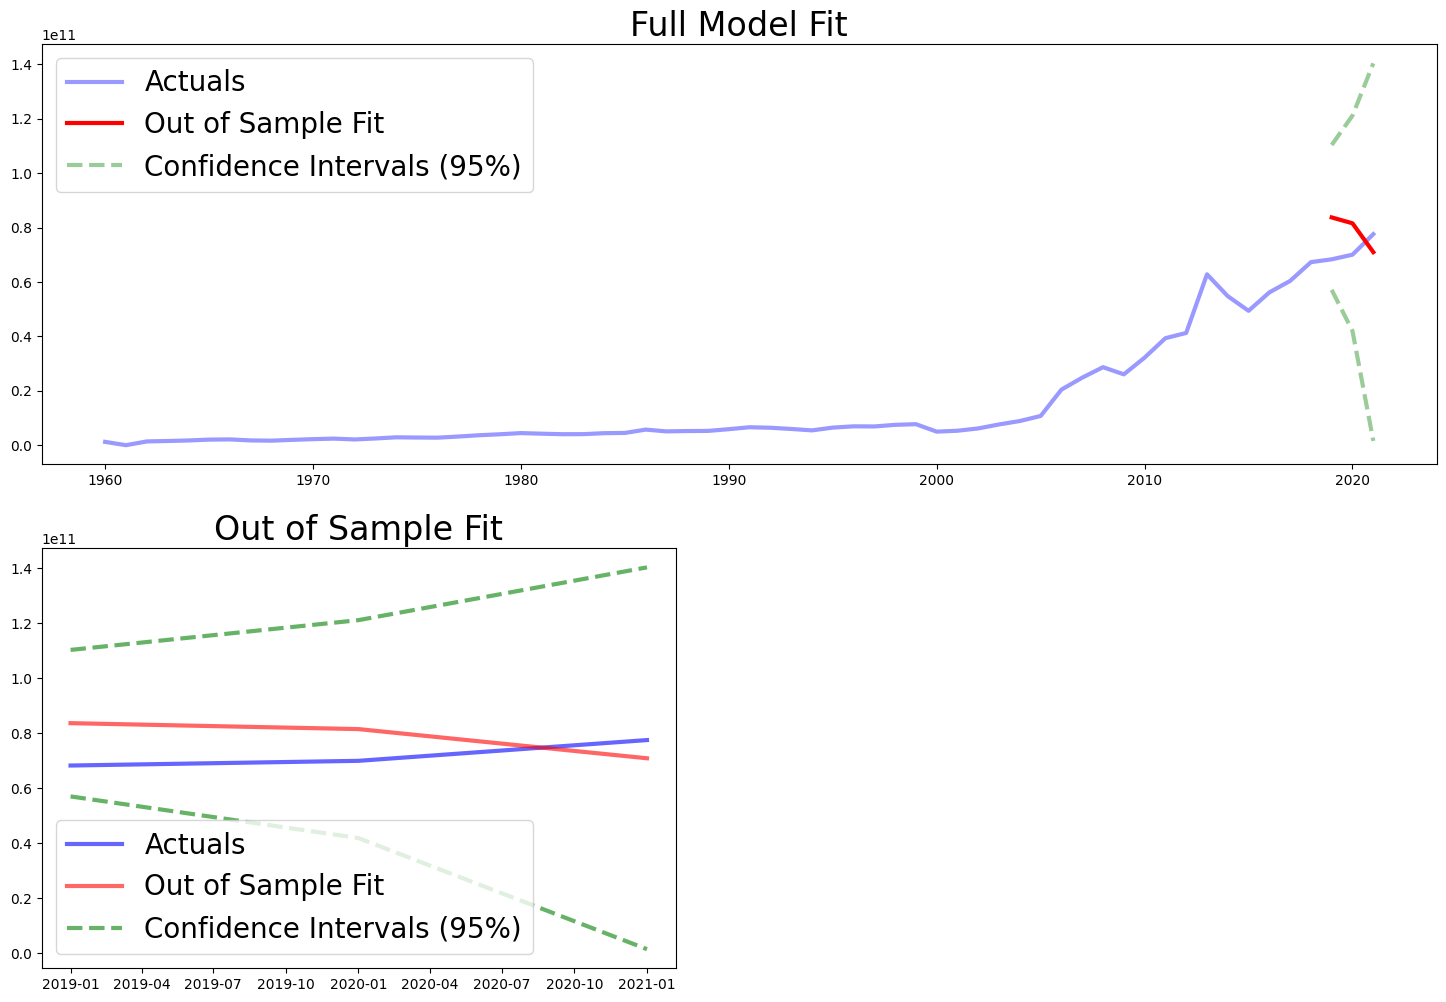

In [73]:
plt.rcParams["figure.figsize"] = 18, 12

plt.subplot(2, 1, 1)
plt.plot(pred_df['GDP (current US$)'], color="blue", label="Actuals", alpha=0.4)

plt.plot(
    pred_df.loc[test_df.index]["model_preds"],
    color="red",
    linestyle="-",
    label="Out of Sample Fit",
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_lower"],
    color="green",
    linestyle="--",
    label="Confidence Intervals (95%)",
    alpha=0.4,
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_upper"],
    color="green",
    linestyle="--",
    alpha=0.4,
)

plt.title("Full Model Fit", size=24)
plt.legend()

plt.subplot(2, 2, 3)

plt.plot(
    pred_df.loc[test_df.index]['GDP (current US$)'], color="blue", label="Actuals", alpha=0.6
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds"],
    color="red",
    linestyle="-",
    label="Out of Sample Fit",
    alpha=0.6,
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_lower"],
    color="green",
    linestyle="--",
    label="Confidence Intervals (95%)",
    alpha=0.6,
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_upper"],
    color="green",
    linestyle="--",
    alpha=0.6,
)

plt.title("Out of Sample Fit", size=24)
plt.legend()

plt.show()

In [106]:
# проверим данные на пропуски с помощью функции asfreq
df_asfreq = data.asfreq(freq='AS')
missing_dates = df_asfreq[df_asfreq.isnull().any(axis=1)].index
missing_dates

DatetimeIndex([], dtype='datetime64[ns]', name='year', freq='AS-JAN')

In [107]:
df_asfreq.isna().sum()
# мы видим что явных пропусков нет

GDP (current US$)    0
dtype: int64

In [135]:
import numpy as np
# так как ВВП не может быть равным нулю
# заменим неявные пропуски (нули) на наны
data['GDP (current US$)'] = data['GDP (current US$)'].apply(lambda x: np.nan if x==0 else x)

In [136]:
# проверим наличие пропусков
df_asfreq = data.asfreq(freq='AS')
missing_dates = df_asfreq[df_asfreq.isnull().any(axis=1)].index
df_asfreq.isna().sum()

GDP (current US$)    1
dtype: int64

In [137]:
# с помощью интерполяции заполним пропуски
data['GDP (current US$)'] = data['GDP (current US$)'].interpolate(method='linear')

In [138]:
df_asfreq = data.asfreq(freq='AS')
missing_dates = df_asfreq[df_asfreq.isnull().any(axis=1)].index
data.isna().sum()

GDP (current US$)    0
dtype: int64

После проверки видно что пропуск был заполнен

In [113]:
# разобьем данные на трейн и тест, так как был изменени занчальный датасет
train_df = data.iloc[:-3]
test_df = data.iloc[-3:]
train_df.shape, test_df.shape

((59, 1), (3, 1))

In [94]:
test1 = adfuller(train_df['GDP (current US$)'])
print("adf: ", test1[0])
print("p-value: ", test1[1])
print("Critical values: ", test1[4])
if test1[0] > test1[4]["5%"]:
    print("ряд нестационарен")
else:
    print("ряд стационарен")

adf:  0.8030073326980115
p-value:  0.9916845572455877
Critical values:  {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
ряд нестационарен


In [95]:
test1 = adfuller(train_df['GDP (current US$)'].diff(periods=1).dropna())
print("adf: ", test1[0])
print("p-value: ", test1[1])
print("Critical values: ", test1[4])
if test1[0] > test1[4]["5%"]:
    print("ряд нестационарен")
else:
    print("ряд стационарен")

adf:  -1.8255652246436
p-value:  0.36784515276563423
Critical values:  {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
ряд нестационарен


In [96]:
test1 = adfuller(train_df['GDP (current US$)'].diff(periods=2).dropna())
print("adf: ", test1[0])
print("p-value: ", test1[1])
print("Critical values: ", test1[4])
if test1[0] > test1[4]["5%"]:
    print("ряд нестационарен")
else:
    print("ряд стационарен")

adf:  -3.999803440949154
p-value:  0.0014115408436661007
Critical values:  {'1%': -3.584828853223594, '5%': -2.9282991495198907, '10%': -2.6023438271604937}
ряд стационарен


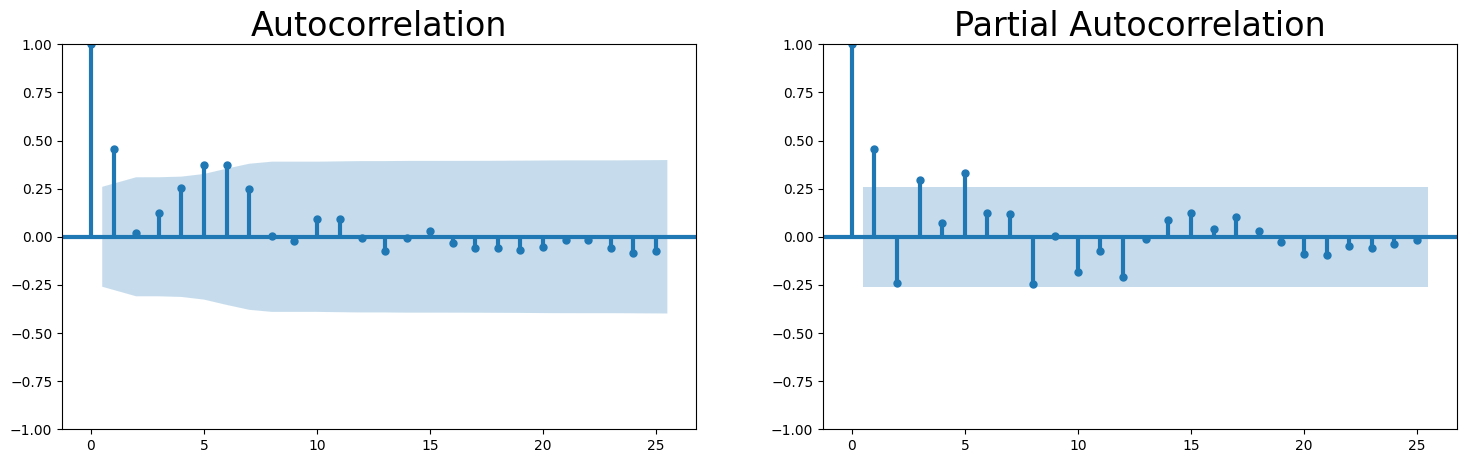

(-3.999803440949154,
 0.0014115408436661007,
 11,
 45,
 {'1%': -3.584828853223594,
  '5%': -2.9282991495198907,
  '10%': -2.6023438271604937},
 2097.033254524892)

In [97]:
# Видно что заменя пропусков не сделала наш ряд стационарным и его так же нужно дважды дифференцировать
plot_acf_pacf(train_df['GDP (current US$)'].diff(periods=2).dropna())
adfuller(train_df['GDP (current US$)'].diff(periods=2).dropna())

In [98]:
smodel = pm.auto_arima(
    train_df,
    start_p=1,
    d=2,
    start_q=1,
    max_p=7,
    max_q=5,
    D=2,
    start_P=0,
    m=2,
    test="adf",
    error_action="ignore",
    trace=True,
)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,2,1)[2]             : AIC=2592.048, Time=0.22 sec
 ARIMA(0,2,0)(0,2,0)[2]             : AIC=2628.080, Time=0.04 sec
 ARIMA(1,2,0)(1,2,0)[2]             : AIC=2602.893, Time=0.20 sec
 ARIMA(0,2,1)(0,2,1)[2]             : AIC=2590.452, Time=0.20 sec
 ARIMA(0,2,1)(0,2,0)[2]             : AIC=2602.459, Time=0.12 sec
 ARIMA(0,2,1)(1,2,1)[2]             : AIC=2589.915, Time=0.27 sec
 ARIMA(0,2,1)(1,2,0)[2]             : AIC=2592.463, Time=0.19 sec
 ARIMA(0,2,1)(2,2,1)[2]             : AIC=2588.400, Time=1.06 sec
 ARIMA(0,2,1)(2,2,0)[2]             : AIC=2587.273, Time=0.53 sec
 ARIMA(0,2,0)(2,2,0)[2]             : AIC=inf, Time=0.52 sec
 ARIMA(1,2,1)(2,2,0)[2]             : AIC=2587.983, Time=0.91 sec
 ARIMA(1,2,0)(2,2,0)[2]             : AIC=inf, Time=0.67 sec
 ARIMA(0,2,1)(2,2,0)[2] intercept   : AIC=2589.607, Time=0.73 sec

Best model:  ARIMA(0,2,1)(2,2,0)[2]          
Total fit time: 5.730 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   59
Model:             SARIMAX(0, 2, 1)x(2, 2, [], 2)   Log Likelihood               -1289.636
Date:                            Tue, 12 Dec 2023   AIC                           2587.273
Time:                                    12:42:24   BIC                           2595.154
Sample:                                01-01-1960   HQIC                          2590.303
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8996      0.490     -1.837      0.066      -1.860       0.060
ar.S.L2       -1.0621      0.493     -2.154      0.031      -2.029      -0.096
ar.S.L4       -0.9993      0.437     -2.289      0.022      -1.855      -0.144
sigma2      1.847e+20   1.48e-21   1.25e+41      0.000    1.85e+20    1.85e+20
===================================================================================
Ljung-Box (L1) (Q):                   6.35   Jarque-Bera (JB):                46.85
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):             148.14   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.93e+56. Standard errors may be unstable.
"""

In [99]:
# AIC ухудшилось на 0,1
# подбор параметров дал те же результаты
seas_model = SARIMAX(train_df['GDP (current US$)'].dropna(), order=(0, 2, 1), seasonal_order=(2, 2, 0, 2))
seas_model_fit = seas_model.fit()
seas_model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  GDP (current US$)   No. Observations:                   59
Model:             SARIMAX(0, 2, 1)x(2, 2, [], 2)   Log Likelihood               -1289.636
Date:                            Tue, 12 Dec 2023   AIC                           2587.273
Time:                                    12:43:45   BIC                           2595.154
Sample:                                01-01-1960   HQIC                          2590.303
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8996      0.490     -1.837      0.066      -1.860       0.060
ar.S.L2       -1.0621      0.493     -2.154      0.031      -2.029      -0.096
ar.S.L4       -0.9993      0.437     -2.289      0.022      -1.855      -0.144
sigma2      1.847e+20   1.48e-21   1.25e+41      0.000    1.85e+20    1.85e+20
===================================================================================
Ljung-Box (L1) (Q):                   6.35   Jarque-Bera (JB):                46.85
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):             148.14   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.93e+56. Standard errors may be unstable.
"""

Критерий AIC незначительно ухудшился
замена пропусков не принесла желаемого результата

In [139]:
data["GDP vol"] = data['GDP (current US$)'].pct_change(1).mul(100).abs()
data["GDP vol"].head()

year
1960-01-01          NaN
1961-01-01     6.789413
1962-01-01     6.357759
1963-01-01    11.448835
1964-01-01    12.363636
Name: GDP vol, dtype: float64

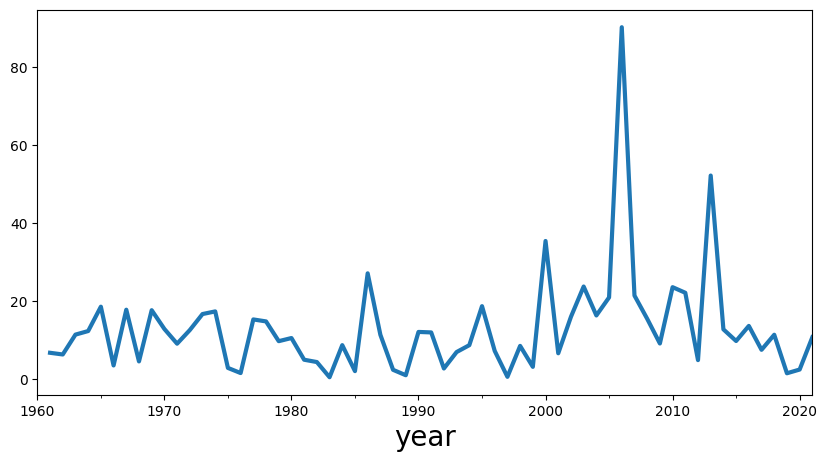

In [140]:
data["GDP vol"].plot()
plt.show()

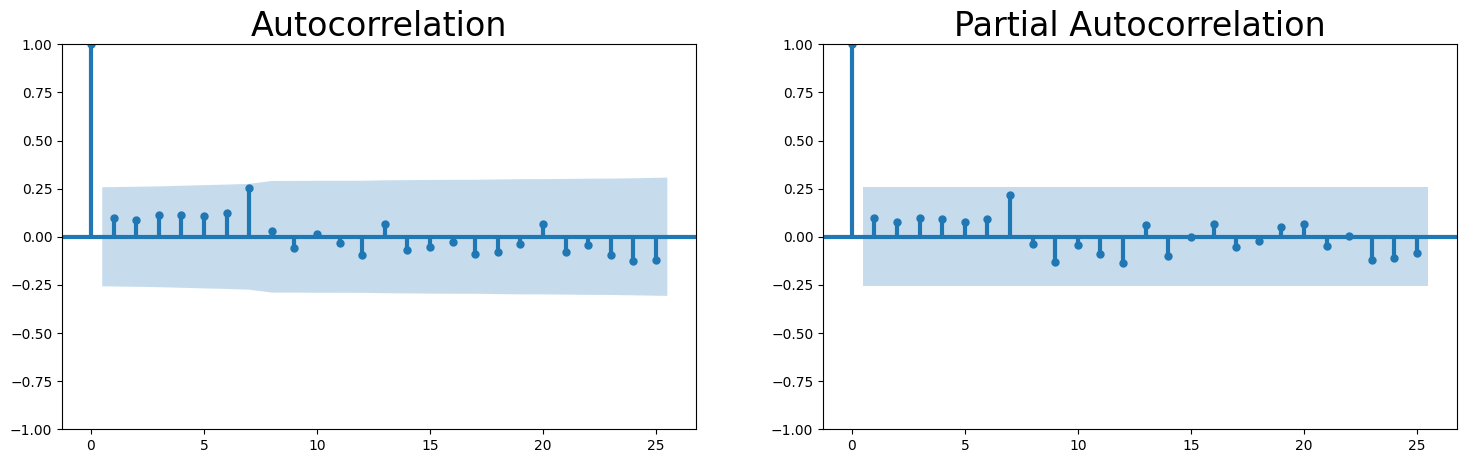

(-6.725311059553779,
 3.4014596148856493e-09,
 0,
 57,
 {'1%': -3.5506699942762414,
  '5%': -2.913766394626147,
  '10%': -2.5946240473991997},
 382.739595975669)

In [147]:
# Видны достаточно сильные пики
# теперь посмотрим на частичную автокорреляцию

train_df = data.iloc[:-3]
test_df = data.iloc[-3:]
plot_acf_pacf(train_df["GDP vol"][1:])
adfuller(train_df["GDP vol"][1:])

# в целом нельзя выделить значимый лаг, значения автокорреляций всех лагод достаточно маленькое

ряд стационарен

In [148]:
garch_df = pd.DataFrame(data[["GDP vol"]].loc[data.index])

garch_df.loc[train_df.index, "GDP vol"] = train_df["GDP vol"].dropna()

In [144]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 10.7 MB/s eta 0:00:00


In [149]:
from arch import arch_model

model = arch_model(garch_df["GDP vol"].dropna(), p=1, q=1)

# в параметре last_obs указываем последний объект, до которого будем совершать обучение.
# в нашем случае это до первого объекта из test выборки

model_results = model.fit(last_obs=test_df.index[0], update_freq=5)

Iteration:      5,   Func. Count:     27,   Neg. LLF: 251.18811047858395
Iteration:     10,   Func. Count:     57,   Neg. LLF: 4522.5403032525255
Iteration:     15,   Func. Count:     89,   Neg. LLF: 228.00251345130135
Iteration:     20,   Func. Count:    114,   Neg. LLF: 226.5978293605918
Optimization terminated successfully    (Exit mode 0)
            Current function value: 226.59781233106128
            Iterations: 22
            Function evaluations: 123
            Gradient evaluations: 22


In [150]:
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                GDP vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -226.598
Distribution:                  Normal   AIC:                           461.196
Method:            Maximum Likelihood   BIC:                           469.437
                                        No. Observations:                   58
Date:                Tue, Dec 12 2023   Df Residuals:                       57
Time:                        14:38:21   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            12.3191      2.572      4.790  1.666e-06 [  7.279, 17.360]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.6700     24.738      0.148      0.882 [-44.817, 52.157]
alpha[1]   6.0947e-11  9.201e-02  6.624e-10      1.000 [ -0.180,  0.180]
beta[1]        1.0000      0.157      6.384  1.725e-10 [  0.693,  1.307]
========================================================================

Covariance estimator: robust
"""

In [151]:
predictions_df = test_df.copy()
predictions_df["Predictions"] = model_results.forecast().residual_variance.loc[
    test_df.index
]

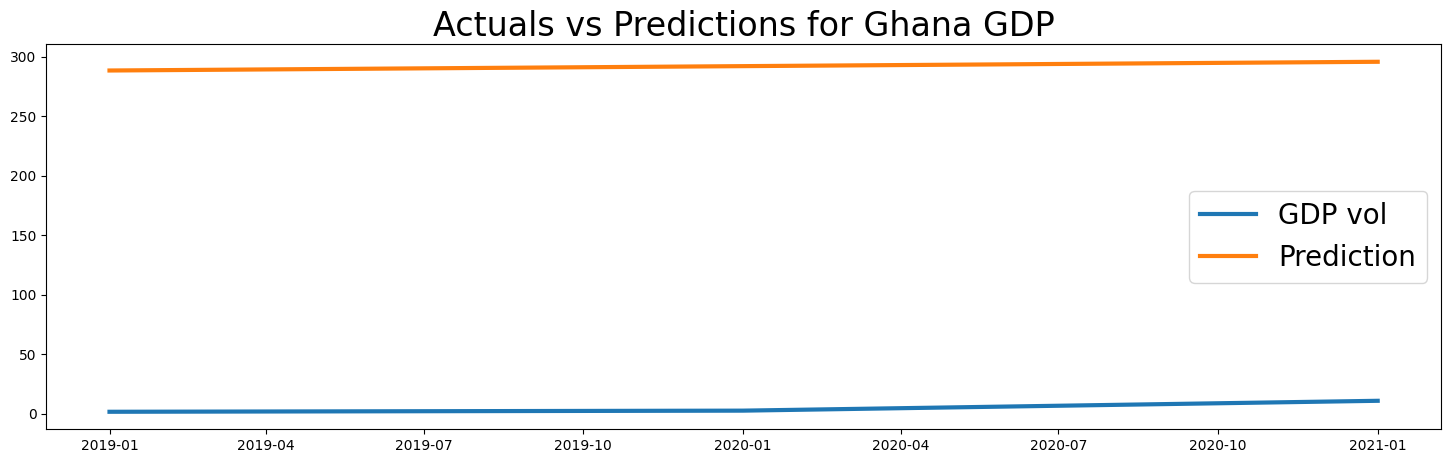

In [158]:
plt.rcParams["figure.figsize"] = 18, 5

plt.plot(predictions_df["GDP vol"].abs())
plt.plot(predictions_df["Predictions"])

plt.title("Actuals vs Predictions for Ghana GDP", size=24)
plt.legend(['GDP vol', 'Prediction'])
plt.show()

К сожалению результат получился не впечатляющий

вероятно у нас слишком мало данных для того чтобы модель могла обучиться улавливать различные тенденции

In [154]:
test_df

,GDP (current US$),GDP vol
year,,
2019-01-01,6.833754e+10,1.542746
2020-01-01,7.004320e+10,2.495937
2021-01-01,7.759428e+10,10.780603
